<a href="https://colab.research.google.com/github/vinay10949/AnalyticsAndML/blob/master/Kaggle/Santander%20Customer%20Satisfaction/Santander_Customer_Satisfaction_DataEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Downloading data from Kaggle**

In [217]:
!pip install --user kaggle
!mkdir .kaggle
import json
token = {"username":"vinay10949","key":"59c4901452f76ce62979e5b0997e240b"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)    
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c santander-customer-satisfaction
!unzip train.csv.zip
!unzip test.csv.zip

mkdir: cannot create directory ‘.kaggle’: File exists
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
!pip install feature_engine


In [0]:
#Selected Columns  {'num_var22_ult1', 'saldo_medio_var5_hace3', 'num_trasp_var11_ult1', 'saldo_medio_var13_largo_hace3', 'imp_aport_var13_ult1', 'saldo_medio_var17_hace2', 'saldo_var8', 'num_var20_0', 'imp_op_var39_comer_ult1', 'num_var30_0', 'delta_imp_aport_var13_1y3', 'num_var45_hace3', 'ind_var5', 'saldo_var1', 'saldo_var13_corto', 'ind_var5_0', 'saldo_medio_var12_hace3', 'ind_var13_0', 'saldo_var33', 'imp_aport_var13_hace3', 'num_aport_var13_hace3', 'saldo_var13_largo', 'num_var22_ult3', 'saldo_var12', 'num_aport_var13_ult1', 'saldo_medio_var44_hace3', 'saldo_var44', 'saldo_medio_var8_hace2', 'num_op_var40_comer_ult1', 'saldo_var5', 'num_med_var45_ult3', 'ind_var12_0', 'var15', 'num_compra_var44_ult1', 'imp_var7_recib_ult1', 'saldo_medio_var44_hace2', 'num_op_var40_ult1', 'saldo_medio_var33_hace3', 'num_meses_var39_vig_ult3', 'num_var22_hace3', 'saldo_medio_var13_largo_hace2', 'imp_reemb_var13_ult1', 'num_meses_var13_largo_ult3', 'var36', 'var38', 'saldo_medio_var5_hace2', 'num_op_var41_efect_ult1', 'delta_imp_trasp_var17_in_1y3', 'saldo_var30', 'imp_op_var40_ult1', 'num_op_var40_hace2', 'num_var4', 'ind_var39_0', 'num_var22_hace2'}


# **Importing libraries**

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from scipy.stats import boxcox
import scipy.stats as stats
from feature_engine.outlier_removers import Winsorizer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from feature_engine.categorical_encoders import WoERatioCategoricalEncoder

# **Loading data**

In [0]:
train_data=pd.read_csv("train.csv")
validation_data=pd.read_csv("test.csv") ## Not to be used to avoid data leakage
trainX, testX, trainY, testY = train_test_split(train_data.drop(labels=['ID'], axis=1),train_data['TARGET'], stratify=train_data['TARGET'] ,test_size=0.3,random_state=0)
columnsSelectedFromDataPrep=['num_var22_ult1', 'saldo_medio_var5_hace3', 'num_trasp_var11_ult1', 'saldo_medio_var13_largo_hace3', 'imp_aport_var13_ult1', 'saldo_medio_var17_hace2', 'saldo_var8', 'num_var20_0', 'imp_op_var39_comer_ult1', 'num_var30_0', 'delta_imp_aport_var13_1y3', 'num_var45_hace3', 'ind_var5', 'saldo_var1', 'saldo_var13_corto', 'ind_var5_0', 'saldo_medio_var12_hace3', 'ind_var13_0', 'saldo_var33', 'imp_aport_var13_hace3', 'num_aport_var13_hace3', 'saldo_var13_largo', 'num_var22_ult3', 'saldo_var12', 'num_aport_var13_ult1', 'saldo_medio_var44_hace3', 'saldo_var44', 'saldo_medio_var8_hace2', 'num_op_var40_comer_ult1', 'saldo_var5', 'num_med_var45_ult3', 'ind_var12_0', 'var15', 'num_compra_var44_ult1', 'imp_var7_recib_ult1', 'saldo_medio_var44_hace2', 'num_op_var40_ult1', 'saldo_medio_var33_hace3', 'num_meses_var39_vig_ult3', 'num_var22_hace3', 'saldo_medio_var13_largo_hace2', 'imp_reemb_var13_ult1', 'num_meses_var13_largo_ult3', 'var36', 'var38', 'saldo_medio_var5_hace2', 'num_op_var41_efect_ult1', 'delta_imp_trasp_var17_in_1y3', 'saldo_var30', 'imp_op_var40_ult1', 'num_op_var40_hace2', 'num_var4', 'ind_var39_0', 'num_var22_hace2']
trainX=trainX[columnsSelectedFromDataPrep]
testX=testX[columnsSelectedFromDataPrep]
validationX=validation_data[columnsSelectedFromDataPrep]
columnsToObserve=['num_var22_ult1', 'saldo_medio_var5_hace3', 'saldo_var5', 'var36', 'num_med_var45_ult3', 'var38', 'saldo_medio_var5_hace2', 'var15', 'imp_op_var39_comer_ult1', 'saldo_var30', 'num_var22_ult3', 'num_var45_hace3', 'num_meses_var39_vig_ult3', 'num_var22_hace3', 'num_var4', 'num_var22_hace2']


In [221]:
trainY.value_counts(),testY.value_counts()

(0    51108
 1     2106
 Name: TARGET, dtype: int64, 0    21904
 1      902
 Name: TARGET, dtype: int64)

# **HelperFunctions**

In [0]:
def encode_rare_categories(trainX,testX,validation_data,tol=0.05,n_categories=4,variables=[]):
  rare_encoder = RareLabelCategoricalEncoder(
    tol=tol,  # minimal percentage to be considered non-rare
    n_categories=n_categories, # minimal number of categories the variable should have to re-cgroup rare categories
    variables=variables)
  trainX[variables]=trainX[variables].astype('object')
  rare_encoder.fit(trainX)
  trainX=rare_encoder.transform(trainX)
  testX=rare_encoder.transform(testX)
  validation_data=rare_encoder.transform(validation_data)
  return trainX,testX,validationX


def diagnostic_plots(df,df2, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments
    # define figure size
    plt.figure(figsize=(16, 4))
    # histogram
    plt.subplot(1, 4, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')
    # Q-Q plot
    plt.subplot(1, 4, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()
    trainWithTarget=pd.concat([df,df2],axis=1)
    sns.FacetGrid(trainWithTarget, hue="TARGET", size=6) \
   .map(plt.hist, variable) \
   .add_legend()
    plt.title('Customer Target With'+ variable)
    plt.show()




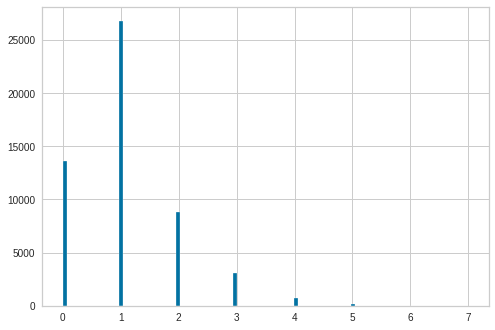

1    26780
0    13635
2     8859
3     3081
4      706
5      124
6       23
7        6
Name: num_var4, dtype: int64


In [223]:
#variable 4 seeems to be Categorical
trainX.num_var4.hist(bins=100)
plt.show()

print(trainX.num_var4.value_counts())

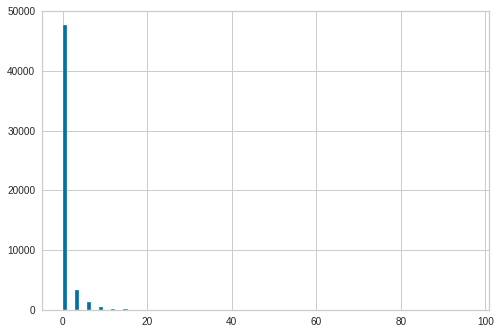

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


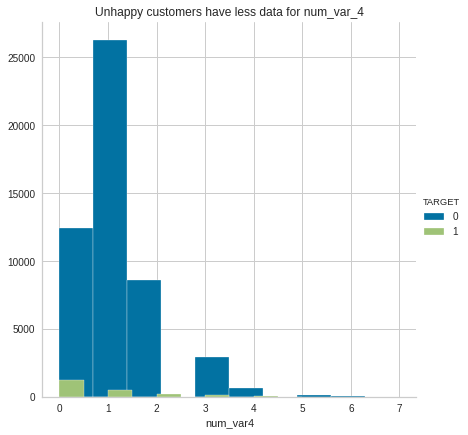

In [225]:
#variable 4 seeems to be Categorical
trainX.num_var22_ult1.hist(bins=100)
plt.show()

#print(trainX.num_var22_ult1.value_counts())

trainWithTarget=pd.concat([trainX,trainY],axis=1)
sns.FacetGrid(trainWithTarget, hue="TARGET", size=6) \
   .map(plt.hist, "num_var4") \
   .add_legend()
plt.title('Unhappy customers have less data for num_var_4')
plt.show()

In [0]:
trainX.num_var4.value_counts()

In [0]:
#Encoding num_var4

trainX,testX,validationX=encode_rare_categories(trainX,testX,validationX,tol=0.05,n_categories=5,variables=['num_var4'])
print(trainX.num_var4.value_counts())
trainX['num_var4']=trainX['num_var4'].astype('category')
testX['num_var4']=testX['num_var4'].astype('category')
validationX['num_var4']=validationX['num_var4'].astype('category')

'''
1       26780
0       13635
2        8859
3        3081
Rare      859
Name: num_var4, dtype: int64

'''

In [0]:
trainData=pd.concat([trainX, trainY], axis=1)

trainData[trainData.TARGET==1]['num_var4'].value_counts().plot(kind='bar')
plt.title('Amount of unhappy customers for num_var4');

**num_var4 ==0 shown more unhappy customers followed by num_var4==1**

# **Univariate Analysis Variable num_var22_ult1**

In [0]:
for col in ['num_var22_ult1']:
    temp_df = pd.Series(trainX[col].value_counts() / len(trainX) )
    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of num_var22_ult1')
    plt.show()

In [0]:
#Encoding num_var22_ult1

trainX,testX,validationX=encode_rare_categories(trainX,testX,validationX,tol=0.05,n_categories=5,variables=['num_var22_ult1'])
print(trainX.num_var22_ult1.value_counts())
trainX['num_var22_ult1']=trainX['num_var22_ult1'].astype('category')
testX['num_var22_ult1']=testX['num_var22_ult1'].astype('category')
validationX['num_var22_ult1']=validationX['num_var22_ult1'].astype('category')

print(trainX.num_var22_ult1.value_counts())
print('% of num_var22_ult1',trainX.num_var22_ult1.value_counts() / len(trainX))

trainData=pd.concat([trainX, trainY], axis=1)

trainData[trainData.TARGET==1]['num_var22_ult1'].value_counts().plot(kind='bar')
plt.title('Amount of unhappy customers for num_var22_ult1');


**num_var22_ult1==0 shown more unhappy customers**

In [0]:

df2 = trainData.groupby(['num_var22_ult1', 'TARGET'])['num_var22_ult1'].count()
#df2[['num_var22_ult1','TARGET']].plot(kind='bar', stacked=True)
df2

# Engineering var15 variable

In [0]:
trainX['var15_boxcox'], param = stats.boxcox(trainX['var15']) 

print('Optimal λ: ', param)

diagnostic_plots(trainX,trainY,'var15')
diagnostic_plots(trainX,trainY,'var15_boxcox')
trainX=trainX.drop(['var15_boxcox'],axis=1)


In [0]:
'''
windsoriser = Winsorizer(distribution='skewed', 
                          tail='right', # cap left, right or both tails 
                          fold=1,
                          variables=['var15'])

windsoriser.fit(trainX)
trainX =windsoriser.transform(trainX)
testX =windsoriser.transform(testX)
validationX =windsoriser.transform(validationX)

'''

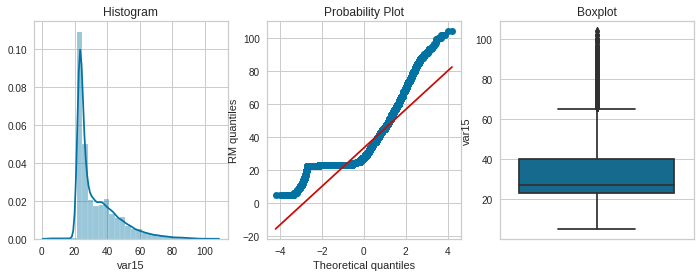

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


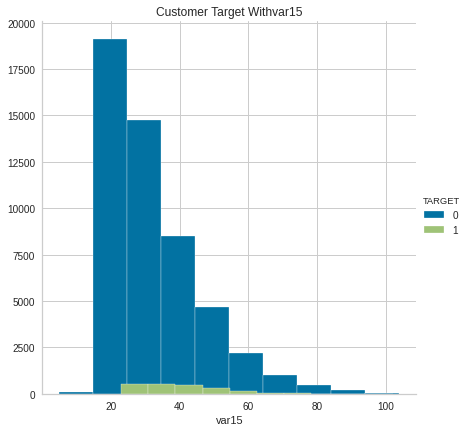

In [240]:
diagnostic_plots(trainX,trainY,'var15')


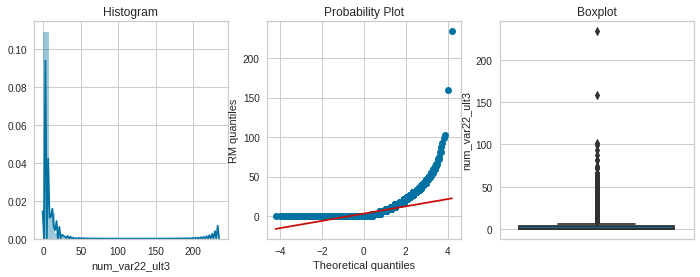

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


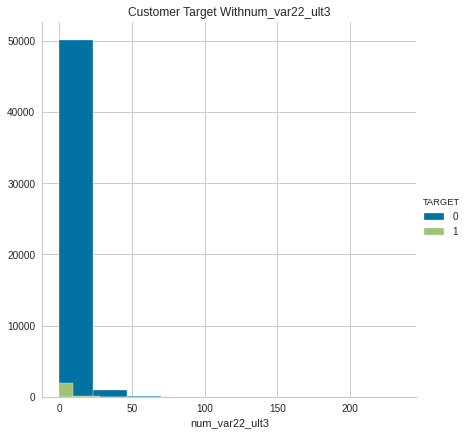

0      33581
3       6155
6       3797
9       2539
12      1705
15      1170
18       722
21       487
24       313
27       199
30       151
33        96
36        50
39        39
42        32
45        18
48        12
54        11
51         8
60         5
63         3
72         3
66         3
57         2
75         1
234        1
81         1
102        1
87         1
99         1
159        1
Name: num_var22_ult3, dtype: int64

In [271]:
#columnsToObserve=['num_var22_ult1', 'saldo_medio_var5_hace3', 'saldo_var5', 'var36', 'num_med_var45_ult3', 'var38', 'saldo_medio_var5_hace2', 'var15', 'imp_op_var39_comer_ult1', 'saldo_var30', 'num_var22_ult3', 'num_var45_hace3', 'num_meses_var39_vig_ult3', 'num_var22_hace3', 'num_var4', 'num_var22_hace2']

diagnostic_plots(trainX,trainY,'num_var22_ult3')
trainX[trainY==0].num_var22_ult3.value_counts()

# **Univariate Analysis Variable var36**

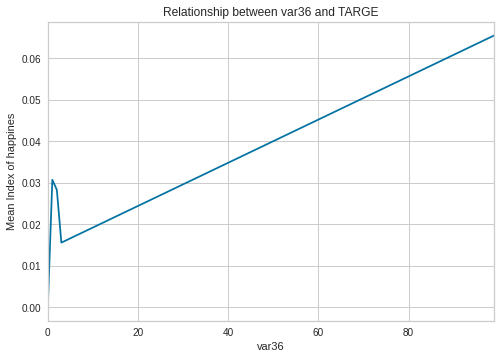

In [342]:
#diagnostic_plots(trainX,trainY,'var36')
trainWithTarget=pd.concat([trainX,trainY],axis=1)
trainX.var36.value_counts()
fig = plt.figure()
fig = trainWithTarget.groupby(['var36'])['TARGET'].mean().plot()
fig.set_title('Relationship between {} and TARGE'.format('var36'))
fig.set_ylabel('Mean Index of happines')
plt.show()

In [347]:
trainX['var36']=trainX['var36'].astype('object')
testX['var36']=testX['var36'].astype('object')
validationX['var36']=validationX['var36'].astype('object')
woe_enc = WoERatioCategoricalEncoder(
    encoding_method = 'ratio',
    variables=['var36'])
woe_enc.fit(trainX, trainY)
trainX = woe_enc.transform(trainX)
testX = woe_enc.transform(testX)
validationX = woe_enc.transform(validationX)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# **Univariate Analysis Variable num_meses_var39_vig_ult3**

In [0]:
trainX['num_meses_var39_vig_ult3']=trainX['num_meses_var39_vig_ult3'].astype('object')
testX['num_meses_var39_vig_ult3']=testX['num_meses_var39_vig_ult3'].astype('object')
validationX['num_meses_var39_vig_ult3']=validationX['num_meses_var39_vig_ult3'].astype('object')
ratio_enc = WoERatioCategoricalEncoder(
    encoding_method = 'ratio',
    variables=['num_meses_var39_vig_ult3'])


ratio_enc.fit(trainX, trainY)

trainX=ratio_enc.transform(trainX)
testX=ratio_enc.transform(testX)
validationX=ratio_enc.transform(validationX)



dtype('float64')

In [0]:
dir(plt)

#**SpotChecking Model**

In [0]:
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLD', Pipeline([('Scaler', StandardScaler()),('LD', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('SVR', RandomForestClassifier())])))
pipelines.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()),('XGB', XGBClassifier(scale_pos_weight=99))])))


# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in pipelines:
	kfold =  RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	cv_results = cross_val_score(model, trainX, trainY, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [0]:
weights = [1, 10, 25, 50, 75, 99, 100, 1000]
max_depth = range(1, 11, 2)
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
colsample_bytree = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]

param_grid = dict(colsample_bytree=colsample_bytree,scale_pos_weight=weights,max_depth=max_depth,n_estimators=n_estimators,learning_rate=learning_rate)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(trainX, trainY)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


# **Training Model**

In [358]:
model = XGBClassifier(scale_pos_weight= 1)
eval_set = [(testX[columnsSelectedFromDataPrep], testY)]
model.fit(trainX[columnsSelectedFromDataPrep], trainY, early_stopping_rounds=10, eval_metric="auc", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(testX[columnsSelectedFromDataPrep])
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(testY, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-auc:0.78877
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.795656
[2]	validation_0-auc:0.799189
[3]	validation_0-auc:0.799068
[4]	validation_0-auc:0.802504
[5]	validation_0-auc:0.802422
[6]	validation_0-auc:0.802886
[7]	validation_0-auc:0.802767
[8]	validation_0-auc:0.802927
[9]	validation_0-auc:0.802967
[10]	validation_0-auc:0.802985
[11]	validation_0-auc:0.803566
[12]	validation_0-auc:0.804098
[13]	validation_0-auc:0.803955
[14]	validation_0-auc:0.803989
[15]	validation_0-auc:0.802579
[16]	validation_0-auc:0.809779
[17]	validation_0-auc:0.810796
[18]	validation_0-auc:0.813469
[19]	validation_0-auc:0.813783
[20]	validation_0-auc:0.814102
[21]	validation_0-auc:0.815683
[22]	validation_0-auc:0.816906
[23]	validation_0-auc:0.818361
[24]	validation_0-auc:0.818232
[25]	validation_0-auc:0.818371
[26]	validation_0-auc:0.819502
[27]	validation_0-auc:0.819506
[28]	validation_0-auc:0.82012
[29]	validation_0-auc:0.820562
[30]	validation_0-

In [0]:
y_valid = model.predict(validationX)
validation_data['TARGET']=y_valid
validation_data[['ID','TARGET']].to_csv("file.csv",index=False)

In [0]:
validation_data[['ID','TARGET']].to_csv("file.csv",index=False)

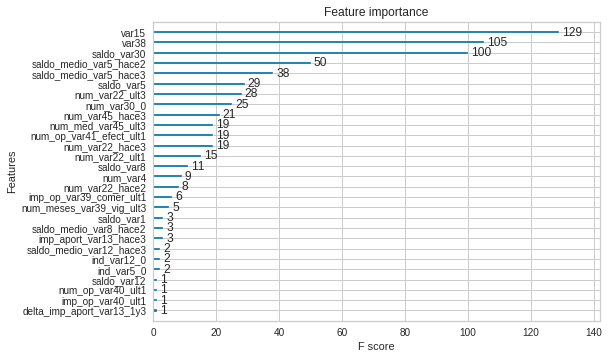

In [316]:

from xgboost import plot_importance
from xgboost import plot_tree
plot_importance(model)
pyplot.show()

In [0]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort
thresholds = sort(model.feature_importances_)[::-1]
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(trainX)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, trainY,eval_metric="auc")
	# eval model
	select_X_test = selection.transform(testX)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(testY, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

In [336]:
selection = SelectFromModel(model, threshold=0.024, prefit=True)
select_X_train = selection.transform(trainX)
# train model
selection_model = XGBClassifier()

selection_model.fit(select_X_train, trainY,eval_metric="auc")
# eval model
select_X_test = selection.transform(testX)
y_pred = selection_model.predict(select_X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(testY, predictions)
print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=12, Accuracy: 96.05%


In [0]:
select_X_validation = selection.transform(validationX)
select_X_test = selection.transform(testX)
y_valid = selection_model.predict(select_X_validation)
validation_data['TARGET']=y_valid
validation_data[['ID','TARGET']].to_csv("file.csv",index=False)

In [334]:
select_X_validation.shape,select_X_train.shape,select_X_test.shape

((75818, 12), (53214, 12), (22806, 12))